# Hyperparameter Tuning and Visualization of Logistic Regression, Random Forest, and SVM Models for Iris Flower Classification

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")


In [15]:
# Load dataset
df = pd.read_csv('Iris.csv')

# Display first few rows
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Prepare Features (X) and Target (y)

In [16]:
# Drop ID column
df = df.drop(columns=['Id'])

# Features and Target
X = df.drop('Species', axis=1)
y = df['Species']

# Encode labels if needed
y = y.astype('category').cat.codes  # Converts labels to 0,1,2


# Split the Data and Scale Features

In [17]:
# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Define Models and Evaluate Without Tuning

In [18]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Store metrics
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

pd.DataFrame(results)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0,1.0


# GridSearchCV for Logistic Regression

In [19]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, scoring='f1_macro', cv=3)
grid_lr.fit(X_train, y_train)

print("Best Params (LR):", grid_lr.best_params_)
print("Best F1 Score (LR):", grid_lr.best_score_)


Best Params (LR): {'C': 1, 'solver': 'lbfgs'}
Best F1 Score (LR): 0.958336880942245


# RandomizedSearchCV for Random Forest

In [20]:
param_dist_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rand_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist_rf,
                             scoring='f1_macro', n_iter=10, cv=3, random_state=42)
rand_rf.fit(X_train, y_train)

print("Best Params (RF):", rand_rf.best_params_)
print("Best F1 Score (RF):", rand_rf.best_score_)


Best Params (RF): {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 3}
Best F1 Score (RF): 0.967032967032967


# GridSearchCV for SVM

In [21]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, scoring='f1_macro', cv=3)
grid_svm.fit(X_train, y_train)

print("Best Params (SVM):", grid_svm.best_params_)
print("Best F1 Score (SVM):", grid_svm.best_score_)


Best Params (SVM): {'C': 0.1, 'kernel': 'linear'}
Best F1 Score (SVM): 0.966680950665625


# Final Evaluation of Best Models

In [22]:
final_models = {
    'Logistic Regression': grid_lr.best_estimator_,
    'Random Forest': rand_rf.best_estimator_,
    'SVM': grid_svm.best_estimator_
}

final_results = []

for name, model in final_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    final_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

pd.DataFrame(final_results)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0,1.0


# Bar Plot of Model Metrics

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


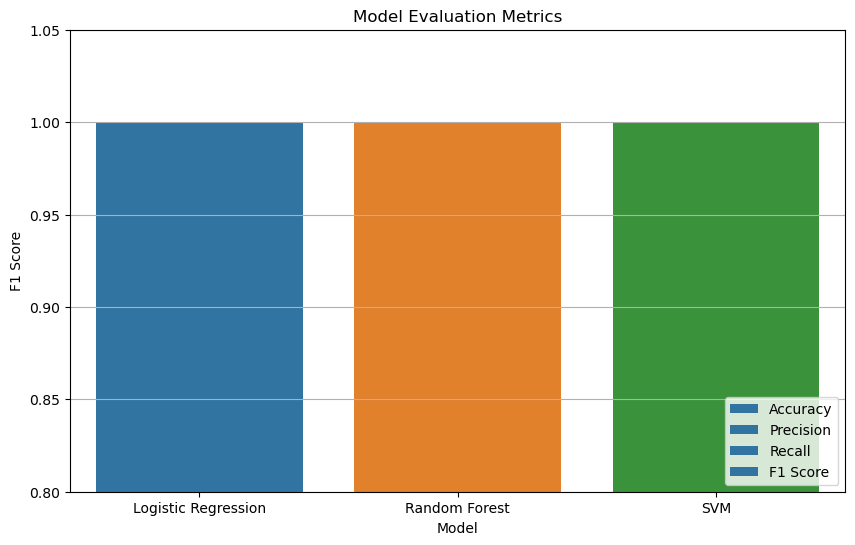

In [24]:
# Convert final_results to DataFrame
df_final = pd.DataFrame(final_results)

# Plot
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    sns.barplot(x='Model', y=metric, data=df_final, label=metric)

plt.title("Model Evaluation Metrics")
plt.legend(loc='lower right')
plt.ylim(0.8, 1.05)
plt.grid(axis='y')
plt.show()


# Confusion Matrix Plots

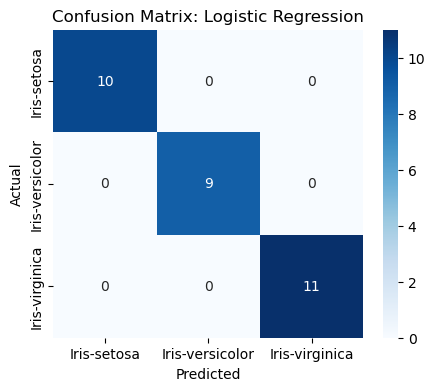

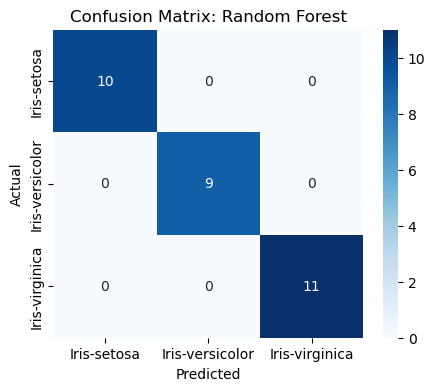

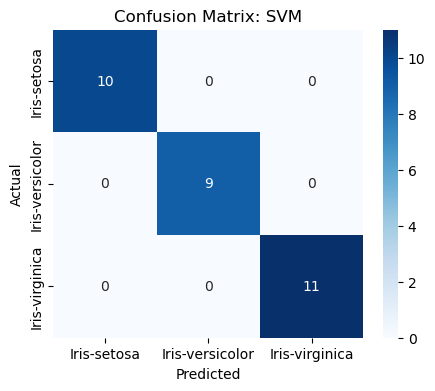

In [25]:
# Reverse label encoding to get original class names
target_names = df['Species'].astype('category').cat.categories

for name, model in final_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Classification Report Heatmap 

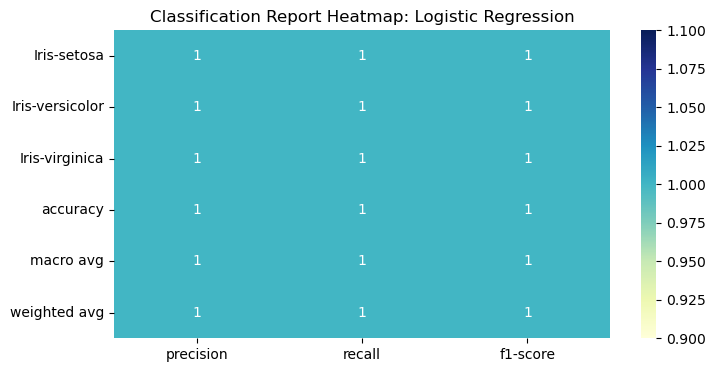

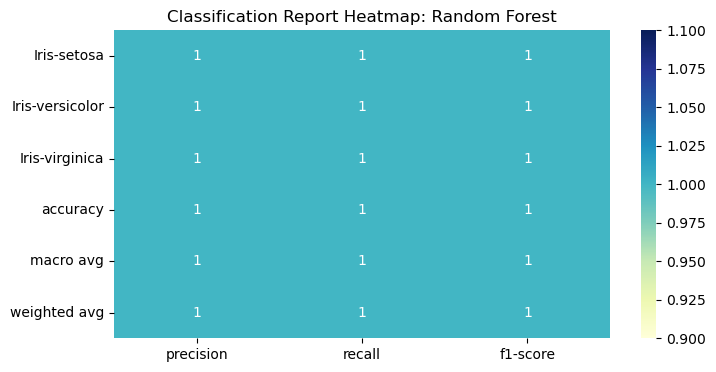

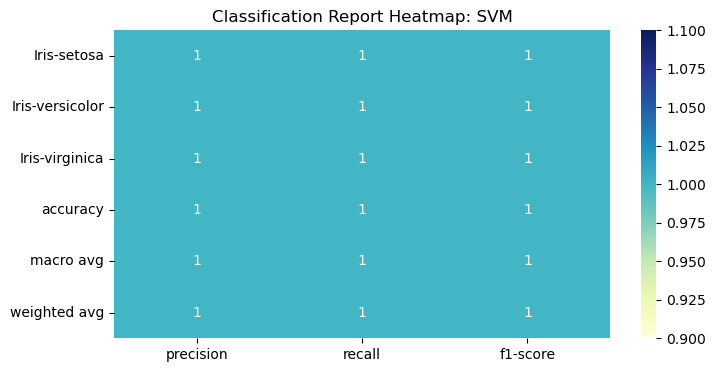

In [26]:
for name, model in final_models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

    plt.figure(figsize=(8, 4))
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
    plt.title(f'Classification Report Heatmap: {name}')
    plt.savefig(f"classification_report_{name.replace(' ', '_').lower()}.png")
    plt.show()
